# Create a connection and cursor

# Insert some sample data

In [6]:
import sqlite3


conn = sqlite3.connect('sales_data.db')
cur = conn.cursor()

# Create table
cur.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

#Insert some sample data
sales_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 5, 1.0),
    ('Oranges', 8, 1.75),
    ('Apples', 15, 2.5),
    ('Bananas', 10, 1.0),
    ('Oranges', 5, 1.75)
]

cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()


# Connect to the database

# SQL Query to summarize data

# Run the query and load into pandas

# Close the connection

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Connect to the database
conn = sqlite3.connect("sales_data.db")

#SQL Query to summarize data
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Run the query and load into pandas
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


# Print the summary

# Plot bar chart of revenue by product

   product  total_qty  revenue
0   Apples        100    250.0
1  Bananas         60     60.0
2  Oranges         52     91.0


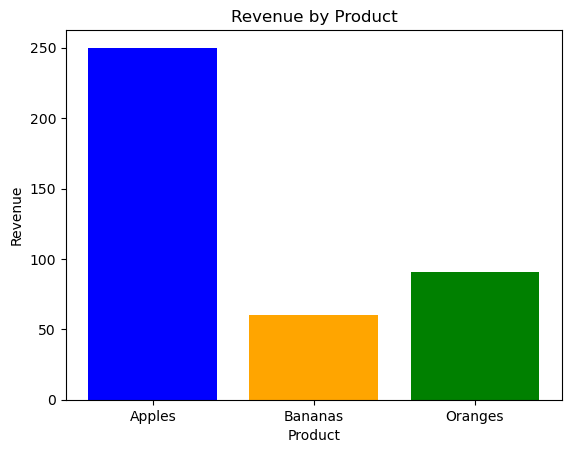

In [10]:
# Print the summary
print(df)

# Plot bar chart of revenue by product
import matplotlib.pyplot as plt

plt.bar(df['product'], df['revenue'], color=['blue', 'orange', 'green'])
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.show()


In [11]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>